# Задание

In [110]:
import pandas as pd
import numpy as np
from sklearn import linear_model, ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
train_data = pd.read_excel('predict_house_price_training_data.xlsx')

In [112]:
train_target = train_data['Оценка риелтора']
train_features = train_data.drop('Оценка риелтора', axis = 1)

### Вывод целевого признака для тренировочных данных

In [113]:
train_target.head()

0    8
1    7
2    7
3    8
4    9
Name: Оценка риелтора, dtype: int64

### Вывод фичей без целевого признака для тренировочных данных

In [114]:
train_features.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,2590,860,1925,0,47.6389,-122.407


In [115]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

In [116]:
test_target = test_data['Оценка риелтора']
test_features = test_data.drop('Оценка риелтора', axis = 1)

### Вывод целевого признака для тестовых данных

In [117]:
test_target.head()

0     7
1    10
2     6
3     8
4     7
Name: Оценка риелтора, dtype: int64

### Вывод фичей без целевого признака для тестовых данных

In [118]:
test_features.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,900,400,1993,0,47.5374,-122.270


# Обучение модели с помощью линейной регрессии

In [119]:
model = linear_model.LinearRegression()
model.fit(train_features, train_target)

LinearRegression()

In [120]:
prediction_linear_regression = model.predict(test_features)
RMSE_linear_regression = np.sqrt(mean_squared_error(test_target, prediction_linear_regression))
MAE_linear_regression = mean_absolute_error(test_target, prediction_linear_regression)

In [121]:
print('RMSE: ', RMSE_linear_regression)
print('MAE: ', MAE_linear_regression)

RMSE:  0.6359755121575936
MAE:  0.4865706981115593


## Визуализация

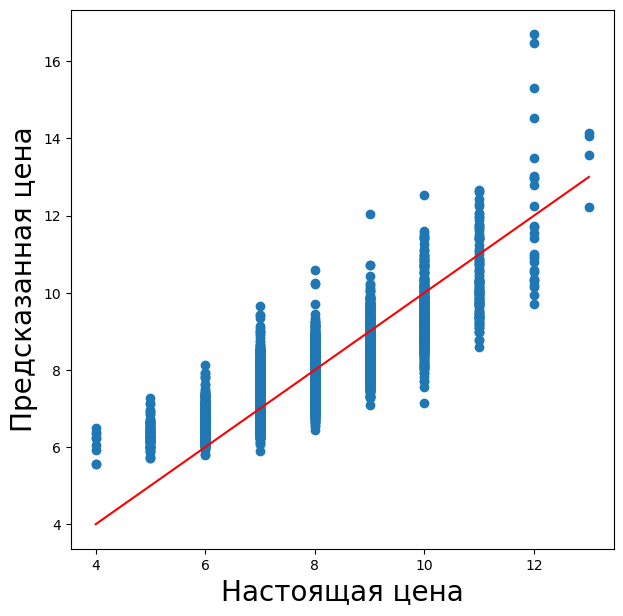

In [122]:
plt.figure(figsize=(7, 7))
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.scatter(test_target, prediction_linear_regression)
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()], 'r');

# Обучение модели с помощью случайного леса

In [123]:
best_depth = 0
best_est = 0
best_result = 1000
best_prediction_random_forest = 0

RMSE_random_forest = 0
MAE_random_forest = 0

for est in range(1, 10):
    for depth in range(10, 51, 10):
        model = ensemble.RandomForestRegressor(n_estimators=est, max_depth=depth)
        model.fit(train_features, train_target)
        prediction = model.predict(test_features)

        result_RMSE = np.sqrt(mean_squared_error(test_target, prediction))
        result_MAE = mean_absolute_error(test_target, prediction)

        if result_RMSE < best_result: # Качество определяю по метрике RMSE
            best_depth = depth
            best_est = est
            best_result = result_RMSE
            best_prediction_random_forest = prediction

            RMSE_random_forest = result_RMSE
            MAE_random_forest = result_MAE

In [124]:
print('RMSE: ', RMSE_random_forest)
print('MAE: ', MAE_random_forest)

RMSE:  0.5542946139891143
MAE:  0.400901364041401


In [125]:
print(f'''Лучшие параметры:
          Лучшая глубина: {best_depth}
          Лучшее кол-во estimators: {best_est}''')

Лучшие параметры:
          Лучшая глубина: 40
          Лучшее кол-во estimators: 9


## Визуализация

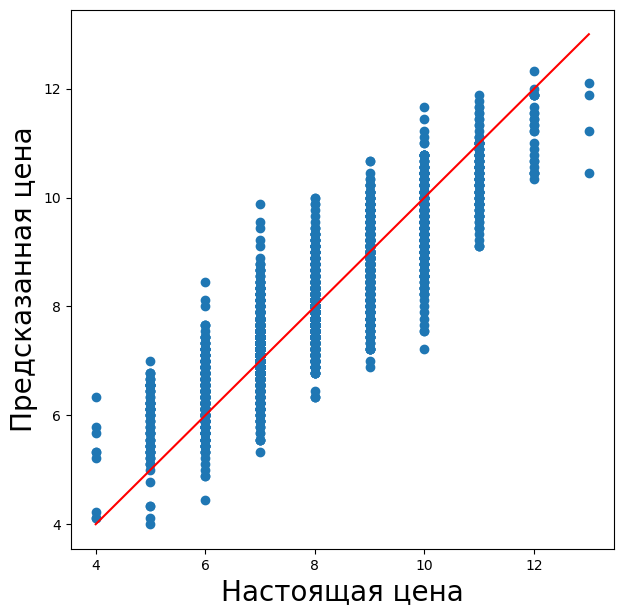

In [126]:
plt.figure(figsize=(7, 7))
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
plt.scatter(test_target, best_prediction_random_forest)
plt.plot([test_target.min(), test_target.max()],
         [test_target.min(), test_target.max()], 'r');

# Вывод
Получились следующие значения метрик RMSE и MAE для линейной регресси:
RMSE:  0.6359755121575936
MAE:  0.4865706981115593

И для случайного леса:
RMSE:  0.5562046383013527
MAE:  0.40600795119610655

Таким образом, модель случайного леса лучше справилась с задачей предсказания оценки риелтора.
Такой вывод следует и из графиков - линия охватывает большее количество данных